In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
import pandas as pd
folder_name = 'playground-series-s5e2'
extra_data = pd.read_csv(folder_name + '/training_extra.csv')
normal_data = pd.read_csv(folder_name + '/train.csv')
train_data = pd.concat([extra_data, normal_data])
test_data = pd.read_csv(folder_name + '/test.csv')
print("Column Names: ")
print(train_data.columns)
print(train_data.head())

Column Names: 
Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')
       id         Brand   Material   Size  Compartments Laptop Compartment  \
0  500000  Under Armour     Canvas  Small          10.0                Yes   
1  500001          Puma  Polyester  Small           4.0                 No   
2  500002      Jansport  Polyester  Small           8.0                Yes   
3  500003          Nike      Nylon  Large           7.0                 No   
4  500004          Nike    Leather  Large           9.0                 No   

  Waterproof      Style  Color  Weight Capacity (kg)      Price  
0        Yes       Tote   Blue             23.882052  114.11068  
1        Yes   Backpack  Green             11.869095  129.74972  
2        Yes       Tote    Red              8.092302   21.37370  
3         No  Messenger   Pink              7.719581   48.09209  
4        Ye

In [53]:
train_data.shape

(3994318, 11)

DataFrame Head:
          Brand Material    Size  Compartments Laptop Compartment Waterproof  \
0      Jansport  Leather  Medium           7.0                Yes         No   
1      Jansport   Canvas   Small          10.0                Yes        Yes   
2  Under Armour  Leather   Small           2.0                Yes         No   
3          Nike    Nylon   Small           8.0                Yes         No   
4        Adidas   Canvas  Medium           1.0                Yes        Yes   

       Style  Color  Weight Capacity (kg)      Price  
0       Tote  Black             11.611723  112.15875  
1  Messenger  Green             27.078537   68.88056  
2  Messenger    Red             16.643760   39.17320  
3  Messenger  Green             12.937220   80.60793  
4  Messenger  Green             17.749338   86.02312   

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   

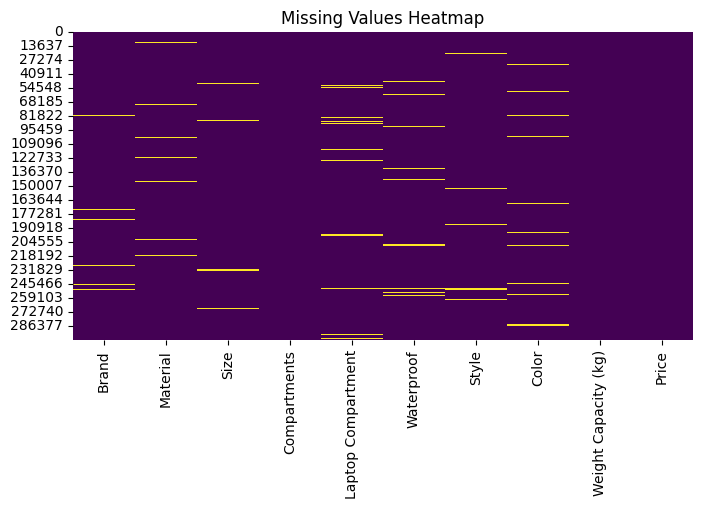

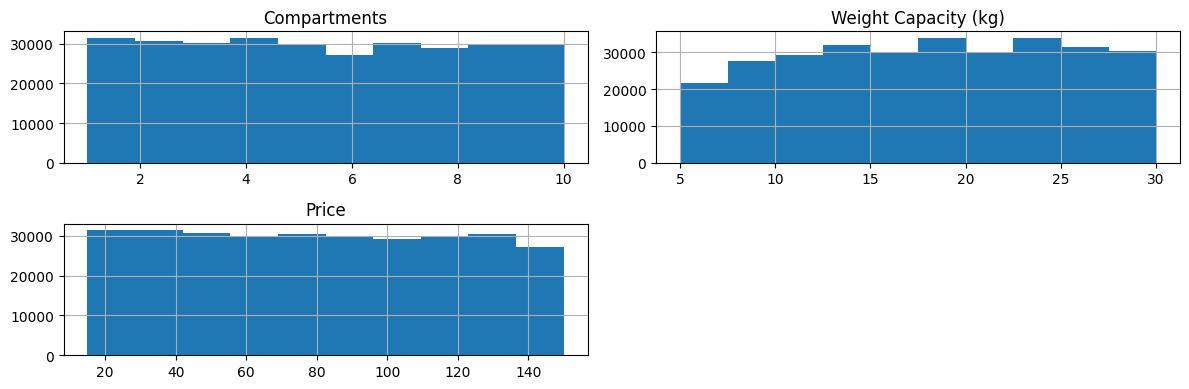

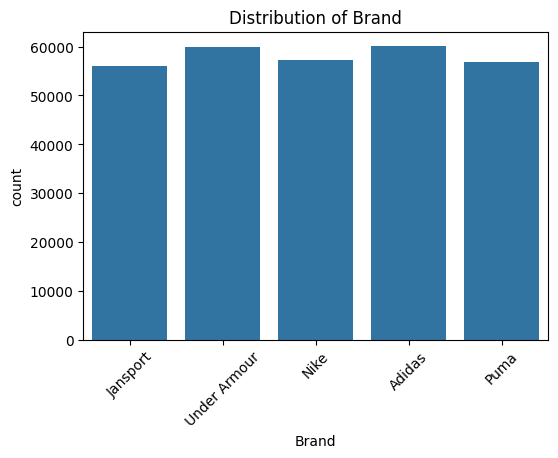

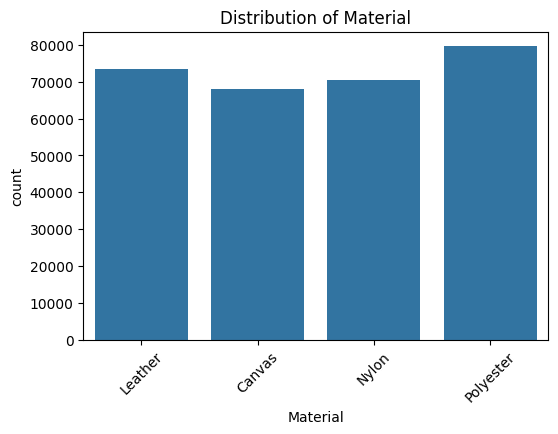

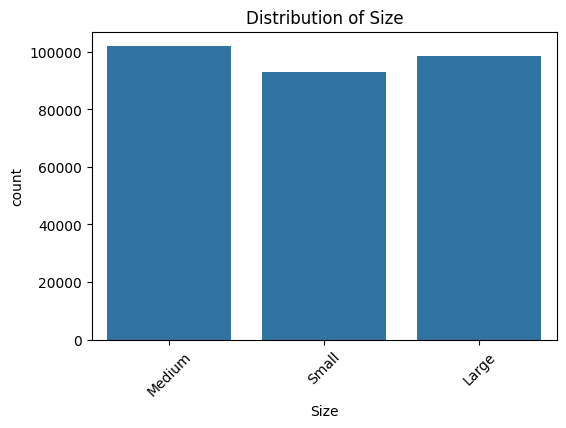

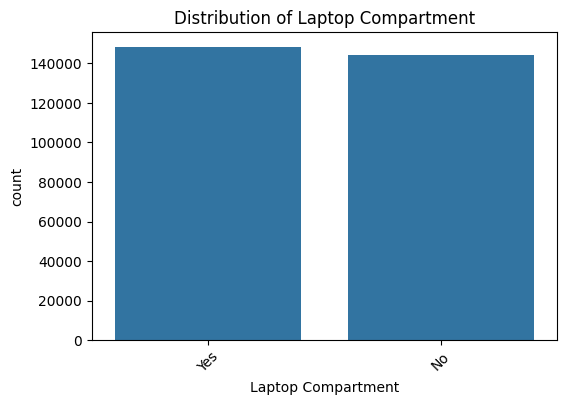

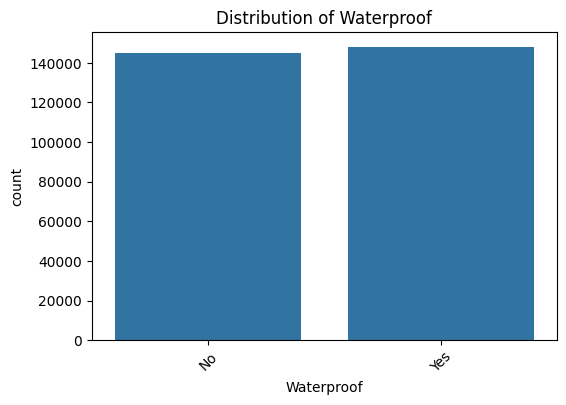

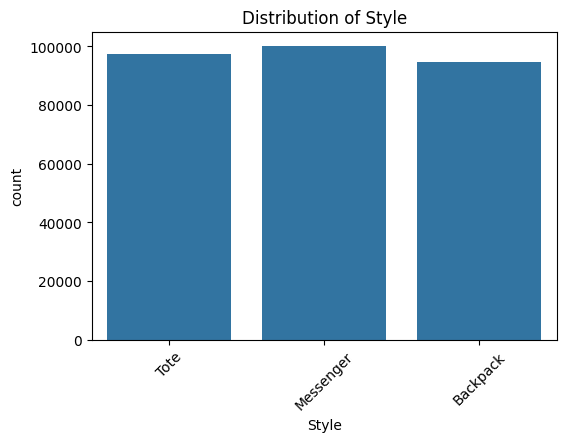

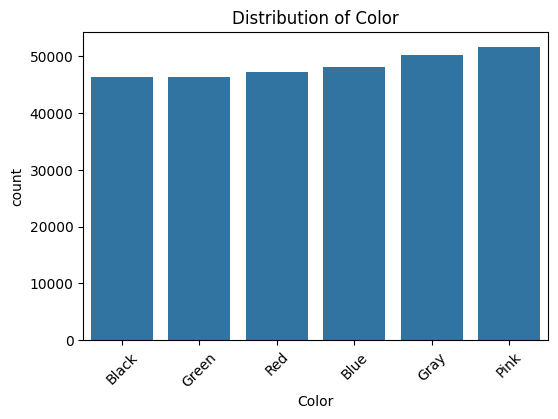

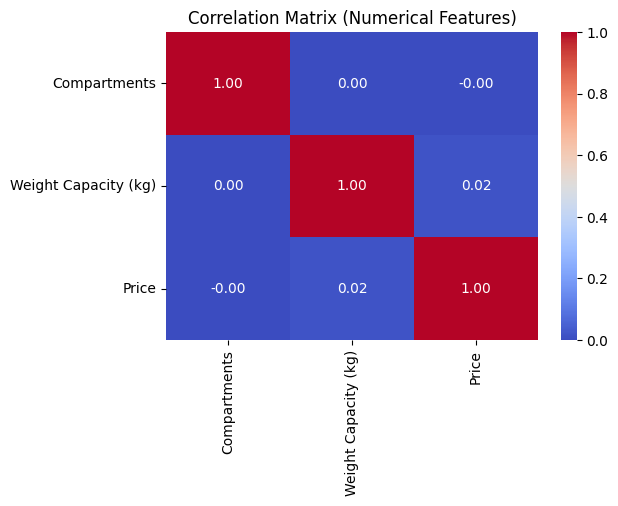

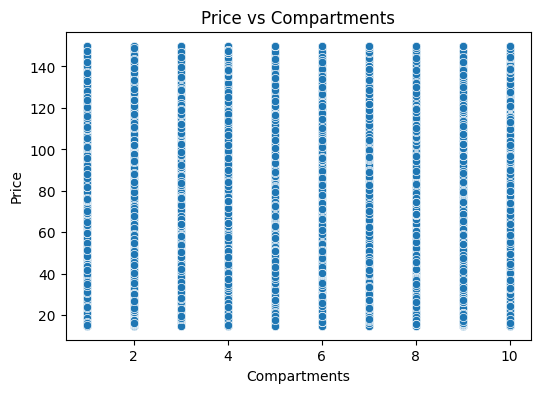

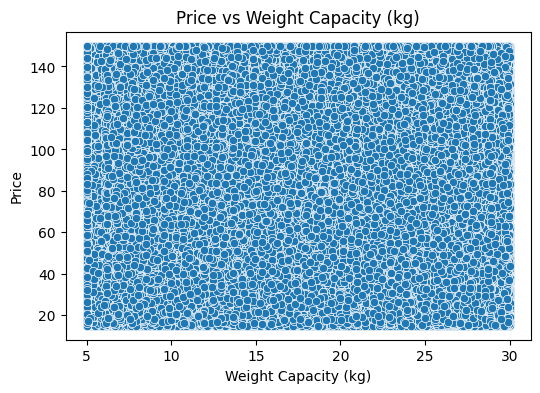

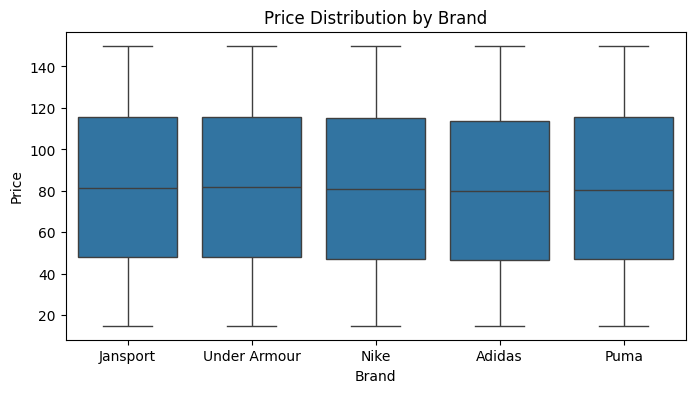

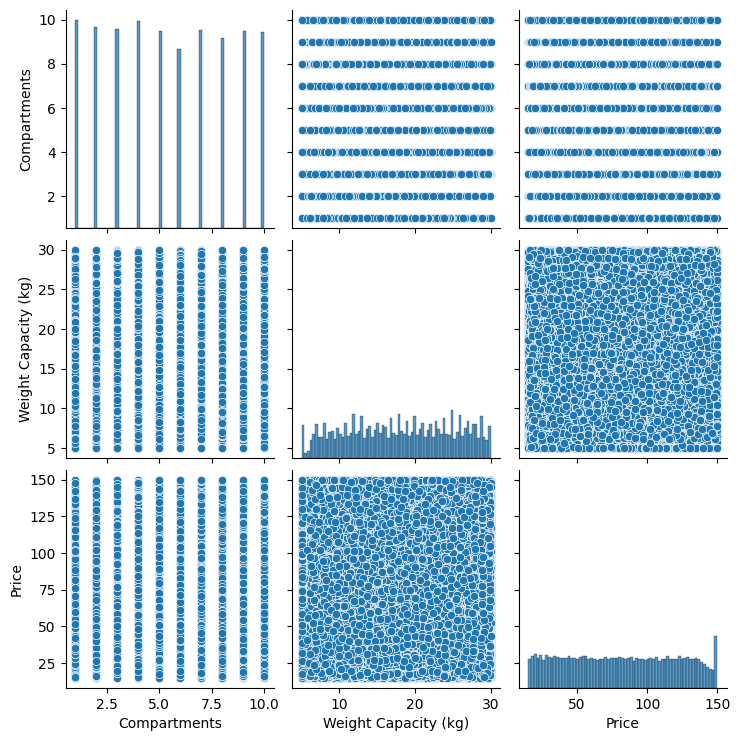

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(train_data)

# Drop the 'id' column if it's not useful for analysis
df = df.drop('id', axis=1)

# 1. Basic Data Overview
print("DataFrame Head:")
print(df.head(), "\n")

print("DataFrame Info:")
print(df.info(), "\n")

print("Summary Statistics:")
print(df.describe(include='all'), "\n")

# 2. Check for Missing Values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Plot missing values if any
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 3. Distribution of Numerical Features
num_cols = ['Compartments', 'Weight Capacity (kg)', 'Price']
df[num_cols].hist(bins=10, figsize=(12, 4))
plt.tight_layout()
plt.show()

# 4. Count Plots for Categorical Features
cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 5. Correlation Analysis (for numerical features)
plt.figure(figsize=(6, 4))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# 6. Relationship between Price and other Numerical Features
for col in ['Compartments', 'Weight Capacity (kg)']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title(f"Price vs {col}")
    plt.show()

# 7. Boxplot for Price across Categories (e.g., Brand)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title("Price Distribution by Brand")
plt.show()

# 8. Pairplot to see pairwise relationships
sns.pairplot(df[num_cols])
plt.show()


In [5]:
# Data cleaning

# Check for missing values
print("Missing values: ")
print(train_data.isnull().sum())

# drop rows with missing values
train_data = train_data.dropna(axis=0)
train_data.shape

# drop id
train_data = train_data.drop(['id'], axis=1)

Missing values: 
id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [6]:
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

df_encoded = pd.get_dummies(train_data, columns=categorical_cols)
df_encoded.head()

,Compartments,Weight Capacity (kg),Price,Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Canvas,Material_Leather,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,10.0,23.882052,114.11068,False,False,False,False,True,True,False,...,True,False,False,True,False,True,False,False,False,False
1,4.0,11.869095,129.74972,False,False,False,True,False,False,False,...,True,True,False,False,False,False,False,True,False,False
2,8.0,8.092302,21.37370,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,7.0,7.719581,48.09209,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,9.0,22.741826,77.32461,False,False,True,False,False,False,True,...,True,False,False,True,False,False,False,True,False,False


In [7]:
x = df_encoded.drop('Price', axis=1).values
y = df_encoded['Price'].values.reshape(-1, 1)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network model
input_size = X_train_tensor.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)  # Output layer for regression
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)    

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    inputs = X_train_tensor.to(device)
    labels = y_train_tensor.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print("Test Loss (MSE):", test_loss.item())
    print("Predicted Prices:", test_outputs.numpy().flatten())

Epoch 10/1000, Loss: 7812.548828125
Epoch 20/1000, Loss: 6793.46826171875
Epoch 30/1000, Loss: 4688.3466796875
Epoch 40/1000, Loss: 2164.802978515625
Epoch 50/1000, Loss: 1735.968505859375
Epoch 60/1000, Loss: 1608.60498046875
Epoch 70/1000, Loss: 1572.339599609375
Epoch 80/1000, Loss: 1544.188720703125
Epoch 90/1000, Loss: 1535.219482421875
Epoch 100/1000, Loss: 1527.8031005859375
Epoch 110/1000, Loss: 1524.9439697265625
Epoch 120/1000, Loss: 1521.7255859375
Epoch 130/1000, Loss: 1519.7938232421875
Epoch 140/1000, Loss: 1518.0916748046875
Epoch 150/1000, Loss: 1516.749267578125
Epoch 160/1000, Loss: 1515.67236328125
Epoch 170/1000, Loss: 1514.7872314453125
Epoch 180/1000, Loss: 1514.0692138671875
Epoch 190/1000, Loss: 1513.48388671875
Epoch 200/1000, Loss: 1513.004638671875


KeyboardInterrupt: 

In [64]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_cols] = cat_imputer.fit_transform(test_data[categorical_cols])

numerical_cols = ['Weight Capacity (kg)']

num_imputer = SimpleImputer(strategy='mean')
test_data[numerical_cols] = num_imputer.fit_transform(test_data[numerical_cols])

test_data_no_id = test_data.drop(['id'], axis=1)
df_test_encoded = pd.get_dummies(test_data_no_id, columns=categorical_cols)
X_test = df_test_encoded.values
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

output_df = pd.DataFrame()
output_df['id'] = test_data['id']
with torch.no_grad():
    test_input = X_test_tensor.to(device)
    test_outputs = model(test_input)
    test_predictions = test_outputs.cpu().numpy().flatten()
    output_df['Price'] = test_predictions

print(output_df.head())



       id      Price
0  300000  82.619789
1  300001  83.862366
2  300002  83.370529
3  300003  82.851883
4  300004  78.839439


In [65]:
output_df.to_csv('submission.csv', index=False)

In [46]:
print(output_df.isnull().sum())

id       0
Price    0
dtype: int64


In [38]:
print(test_data.isnull().sum())



id                       0
Brand                    0
Material                 0
Size                     0
Compartments             0
Laptop Compartment       0
Waterproof               0
Style                    0
Color                    0
Weight Capacity (kg)    77
dtype: int64


In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split


class StratifiedRegressionCV:
    def __init__(self, n_splits=5, n_bins=5, shuffle=True, random_state=42):
        self.n_splits = n_splits
        self.n_bins = n_bins
        self.shuffle = shuffle
        self.random_state = random_state

    def split(self, X, y, groups=None):
        # Create bins from the continuous target variable
        y_bins = pd.qcut(y.ravel(), q=self.n_bins, duplicates='drop', labels=False)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=self.shuffle, random_state=self.random_state)
        return skf.split(X, y_bins, groups)

    def get_n_splits(self, X=None, y=None, groups=None):
        return self.n_splits
# Assuming X_scaled and y are already defined from your preprocessing steps

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train_flat = y_train.ravel()  # flatten if y_train has shape (n_samples, 1)
bins = pd.qcut(y_train_flat, q=5, duplicates='drop', labels=False)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.001],
    'max_depth': [6],
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create StratifiedKFold using the bins as the stratification labels.
cv = StratifiedRegressionCV(n_splits=5, n_bins=5, shuffle=True, random_state=42)

# Note: When using StratifiedKFold with GridSearchCV in a regression setting,
# you must pass the stratification labels separately.
# We do this by providing the binned target variable as the 'groups' for CV.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # negative MSE because GridSearchCV maximizes score
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit grid search on the training data.
grid_search.fit(X_train, y_train)

# Retrieve and print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Negative MSE):", grid_search.best_score_)

# Optionally, evaluate the best model on the test set:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, predictions)
print("Test Loss (MSE):", math.sqrt(test_mse))
print("Predicted Prices:", predictions)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 100}
Best CV Score (Negative MSE): -1507.1134115199638
Test Loss (MSE): 38.80250145878156
Predicted Prices: [81.319725 81.53479  81.53685  ... 81.539116 81.34758  81.65801 ]


In [ ]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_cols] = cat_imputer.fit_transform(test_data[categorical_cols])

numerical_cols = ['Weight Capacity (kg)']

num_imputer = SimpleImputer(strategy='mean')
test_data[numerical_cols] = num_imputer.fit_transform(test_data[numerical_cols])

test_data_no_id = test_data.drop(['id'], axis=1)
df_test_encoded = pd.get_dummies(test_data_no_id, columns=categorical_cols)
X_test = df_test_encoded.values
X_test_scaled = scaler.transform(X_test)

output_df = pd.DataFrame()
output_df['id'] = test_data['id']
test_predictions = best_model.predict(X_test_scaled)
output_df['Price'] = test_predictions
output_df.to_csv('submission.csv', index=False)
print(output_df.head())

       id      Price
0  300000  81.521706
1  300001  81.658012
2  300002  81.488350
3  300003  81.444351
4  300004  81.233055
